<a href="https://colab.research.google.com/github/jumin7/BinarySearchTree/blob/main/ProjectGarciaShrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Task Definition:

Regression- Predict the number of streams a track will have based on certain features (artists, bpm, mode, etc.)

Classification- Set a threshold of 100 million streams to classify the tracks and determine if they are a hit or not

By - Isabella Garcia & Jumin Shrestha

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

dfSpotify = pd.read_csv('spotify-2023.csv', encoding='latin1') #this file is encoded in Latin-1
dfSpotify.head() #read the first few rows


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [11]:
dfSpotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

*   **track_name**: name of the song
*   **artist(s)_name**: artist or artists who sing the song
*   **artist_count**: amount of artists that sing the song
*   **released_year**: year the song was released
*   **released_month**: month the song was released
*   **released_day**: day the song was released in_spotify_playlists: the amount of playlists the song is in
*   **in_spotify_charts**: the amount of times the song has been in a Spotify chart (ex. Top 50)
*   **streams**: total number of streams in_apple_playlists: the amount of Apple playlists the song is in
*   **in_apple_charts**: the amount of times the song has been in an Apple chart
*   **in_deezer_playlists**: the amount of Deezer playlists the song is in
*   **in_deezer_charts**: the amount of times the song has been in a Deezer chart
*   **in_shazam_charts**: the amount of times the song has been in a
*   **bpm**: beats per minute
*   **key**: the key the song was written in
*   **mode**: major or minor scale
*   **danceability_%**: how suitable a song is for dancing
*   **valence_%**: whether a song exudes a positive mood or a sad mood
*   **energy_%**: energy level of the song (based on volume, tempo, intensity, etc.)
*   **acousticness_%**: how acoustic a song is
*   **instrumentalness_%**: the level of instruments versus vocals
*   **liveness_%**: level of live performance elements
*   **speechiness_%**: if a song is more talking based rather than singing (ex. rap)




There is a mix of numerical, categorical, and ordinal data types in this data set. Attributes such as artist_count, streams, and energy_% are examples of numerical features because they are counts and percentages. Attributes like track_name and artist(s)_name are examples of categorical features because they strings that represent unique values for the songs. Attributes like released_year, released_month, and released_day are ordinal features because they are date related.

For the numeric features, columns like bpm may have a more uniform distribution because the values from song to song would not typically significanlty increase or decrease, however, streams could be heavily skewed because there may be some songs that were super popular and have a much larger number than the general pool.

For the categorical features, there will probably be a wide variety in the artist(s)_name and they probably won't repeat too often, specifically for songs with more than one artist. A feature like mode on the other hand would have lots of repeats given that there are only two modes (major and minor).

**Initial Observations:**
1.  There is a lot of data so it may be better to split some features up so we can get an idea of which features have a bigger effect on whether a song is popular or not.
2.   There will probably be missing values given the size of the dataset.
3. We may have to transform some features into numeric columns to perform tests.



In [12]:
# check for missing values
# 1. Data Cleaning, Preprocessing, and Initial Test
# display the count
print("Missing values in each column:")

dfSpotify.isnull().sum()

Missing values in each column:


,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


# Regression/Classification Models


In [13]:
# Drop rows with missing values and assign the result to a new DataFrame
dfSpotify_clean = dfSpotify.dropna()

# Print the shape of the DataFrame after dropping missing values
print("\nShape after dropping missing values:", dfSpotify_clean.shape)


Shape after dropping missing values: (817, 24)


In [15]:
## Regression

# make sure there are no NaN values (not a number)
dfSpotify_clean = dfSpotify_clean.dropna()

# features that may have commas or may not be numeric
numeric_columns = [
    'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists',
    'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
    'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# convert the columns to numeric columns through a for loop
for col in numeric_columns:
    dfSpotify_clean.loc[:, col] = dfSpotify_clean[col].replace({',': ''}, regex = True).astype(float) # convert values into a float

# clean streams column
dfSpotify_clean.loc[:, 'streams'] = pd.to_numeric(dfSpotify_clean['streams'].replace({',': ''}, regex=True), errors='coerce')  # ensure the streams column is numeric
dfSpotify_clean.loc[:, 'streams'] = dfSpotify_clean['streams'].replace({',': ''}, regex = True).astype(float)

# convert key and mode to categorical types and then into numeric codes
dfSpotify_clean.loc[:, 'key'] = dfSpotify_clean['key'].astype('category').cat.codes
dfSpotify_clean.loc[:, 'mode'] = dfSpotify_clean['mode'].astype('category').cat.codes

# defining a hit by stream number (>100 million = hit)
HitNumber = 100000000
dfSpotify_clean.loc[:, 'hit'] = np.where(dfSpotify_clean['streams'] >= HitNumber, 1, 0)

# features: include the features we want to use to predict the streams
features = [
    'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists',
    'in_apple_playlists', 'in_deezer_playlists',  'bpm', 'key', 'mode', 'danceability_%',
    'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# define features and target
X = dfSpotify_clean[features]
y = dfSpotify_clean['streams']

# make sure again that we do not have NaN values in X or y before splitting
X = X.dropna()
y = y[X.index]  # make sure we only have the corresponding y values for each x value

# normalize features
scaler = StandardScaler() # standardizes features: mean=0, sd=1
X_scaled = scaler.fit_transform(X) # calculate mean and sd for each feature

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# train the linear regression model with training sets
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions using the trained linear regression model
y_pred = model.predict(X_test) # now use the test data

# we do not want NaN values
y_test_clean = y_test.dropna() # clean
y_pred = y_pred[~np.isnan(y_pred)] # clean

# evaluation metrics
MSE = mean_squared_error(y_test, y_pred) # difference between the actual values and the predicted values
R2 = r2_score(y_test, y_pred) # how well does the regression model fit the data

print(f"Mean Squared Error: {MSE}")
print(f"R-squared: {R2}")

## Classification

# predict if a song is a hit or not based on predicted streams
# create a new column for the predicted streams
dfSpotify_clean.loc[:, 'predicted_streams'] = model.predict(X_scaled)

# classification: create a new column for whether the song is a hit or not
dfSpotify_clean.loc[:, 'predicted_is_hit'] = np.where(dfSpotify_clean['predicted_streams'] >= HitNumber, 1, 0)


# print the results
print(dfSpotify_clean[['track_name', 'streams', 'predicted_streams', 'hit', 'predicted_is_hit']])

dfSpotify_clean.loc[:, 'predicted_is_hit'] = np.where(dfSpotify_clean['predicted_streams'] >= HitNumber, 1, 0)

# Calculate classification metrics
from sklearn.metrics import accuracy_score

actual_hits = dfSpotify_clean['hit']
predicted_hits = dfSpotify_clean['predicted_is_hit']

print(f"Accuracy Score: {accuracy_score(actual_hits, predicted_hits):.3f}")

Mean Squared Error: 8.341199232462901e+16
R-squared: 0.7279646037541518
                              track_name      streams  predicted_streams  hit  \
0    Seven (feat. Latto) (Explicit Ver.)  141381703.0       2.649926e+08    1   
1                                   LALA  133716286.0       3.327682e+08    1   
2                                vampire  140003974.0       5.170616e+08    1   
3                           Cruel Summer  800840817.0       7.464854e+08    1   
4                         WHERE SHE GOES  303236322.0       4.746781e+08    1   
..                                   ...          ...                ...  ...   
948                         My Mind & Me   91473363.0       4.641078e+08    0   
949            Bigger Than The Whole Sky  121871870.0       3.254753e+08    1   
950                 A Veces (feat. Feid)   73513683.0       1.397385e+08    0   
951                        En La De Ella  133895612.0       2.179893e+08    1   
952                                Al

/tmp/ipython-input-3380087289.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSpotify_clean.loc[:, col] = dfSpotify_clean[col].replace({',': ''}, regex = True).astype(float) # convert values into a float
/tmp/ipython-input-3380087289.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSpotify_clean.loc[:, col] = dfSpotify_clean[col].replace({',': ''}, regex = True).astype(float) # convert values into a float
/tmp/ipython-input-3380087289.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be re

Based on the R-squared value (.728), the model is effective at predicting the number of streams for songs based on the features we selected. Our model explains 72.8% of the variation in the number of streams. This means that the model is useful in predicting a song's popularity. This has real life applications and can be used by record labels and marketing companies to determine whether it is worth investing in a certain artist or type of music. The mean squared error value, however, is quite high. When we first ran the code, the error was much higher so we took out some of the features. The error decreased when we did that but it is still high. This is most likely due to the fact that stream values can vary significantly and we are using several features. We will be looking further into this for our next presentation.

https://medium.com/@albert.w.berger/what-makes-a-song-popular-in-a-certain-country-feat- p%CC%B6i%CC%B6t%CC%B6b%CC%B6u%CC%B6l%CC%B6l%CC%B6-spotify-cd705abc59   

In [16]:
# calculate training set R² for comparison table
train_r2 = model.score(X_train, y_train)
train_r2

0.6852510482110215

## Visualizations

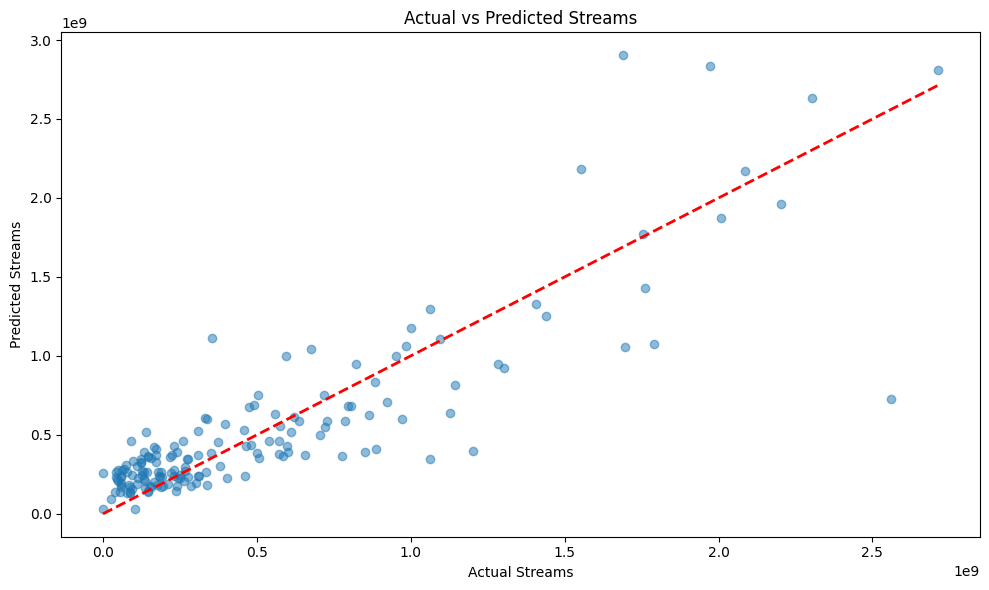

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted Streams Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams')
plt.tight_layout()
plt.show()



Most songs cluster in the lower left corner (0 - 0.5 billion streams), showing that most have relatively low stream counts. The dots generally follow the red line's upward trend, meaning our model captures the general pattern of what makes songs popular. However, it struggles with mega-hits (over 1.5 billion streams), where predictions are less accurate. This makes sense—while certain features can indicate a song's potential success, predicting massive hits is tricky because viral success often depends on factors outside the model's scope, like cultural moments, current TikTok trends or marketing strategies.

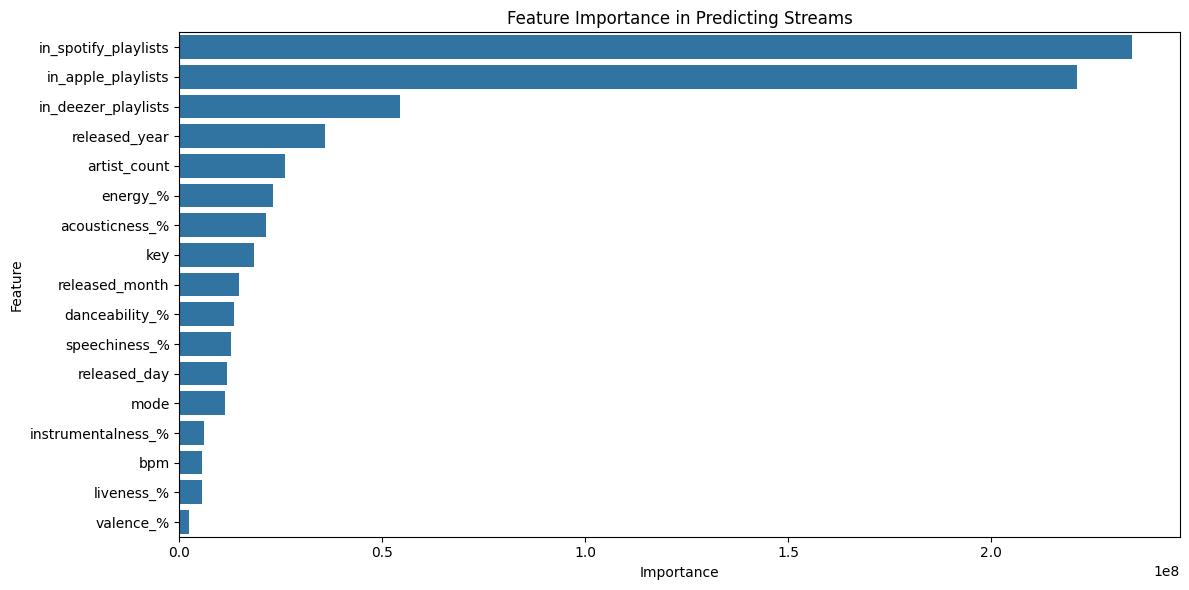

In [18]:
# 2. Feature Importance Plot
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Streams')
plt.tight_layout()
plt.show()


This feature importance plot was created using the absolute values of the coefficients from our Linear Regression model.
It shows us that being included in Spotify and Apple playlists were by far the strongest predictors of streaming success - much more important than the actual musical characteristics like BPM, energy, or danceability like we thought. This makes sense: songs on popular playlists get more exposure, leading to more streams, regardless of their musical qualities.

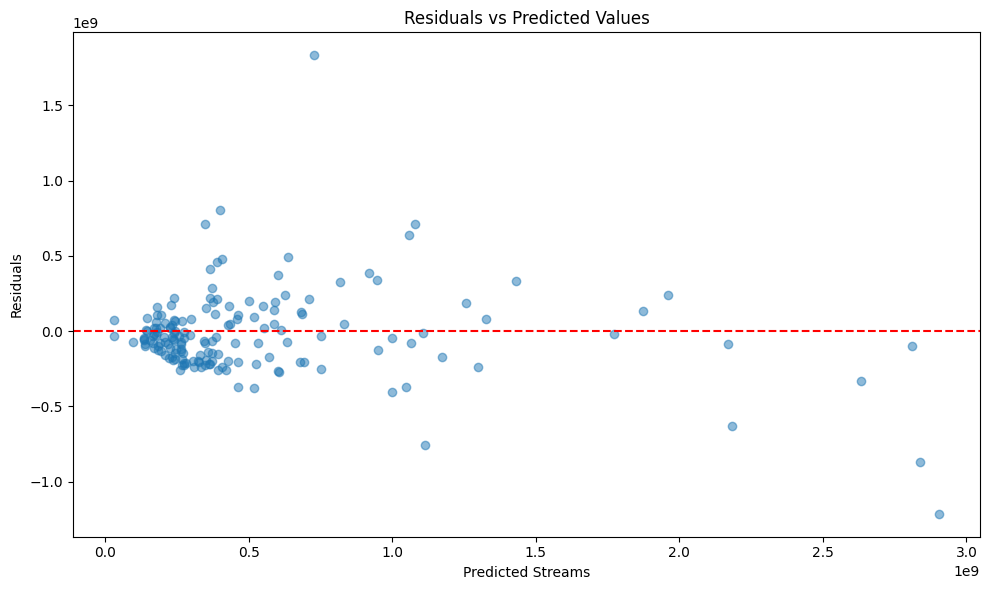

In [19]:
# 3. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Streams')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()


This plot shows our model's errors (residuals) against its predictions to check for biases. The red line at y=0 represents perfect predictions—points above mean we under-predicted, below means we over-predicted.

Most residuals are clustered near zero for lower predicted stream counts, meaning the model performs fairly well for average songs.
As predicted streams increase, residuals spread out more, forming a fan shape. This suggests that the model struggles with highly streamed songs, making larger errors.

There's a noticeable upward trend in residuals for high predictions, meaning the model tends to underestimate the most popular songs.


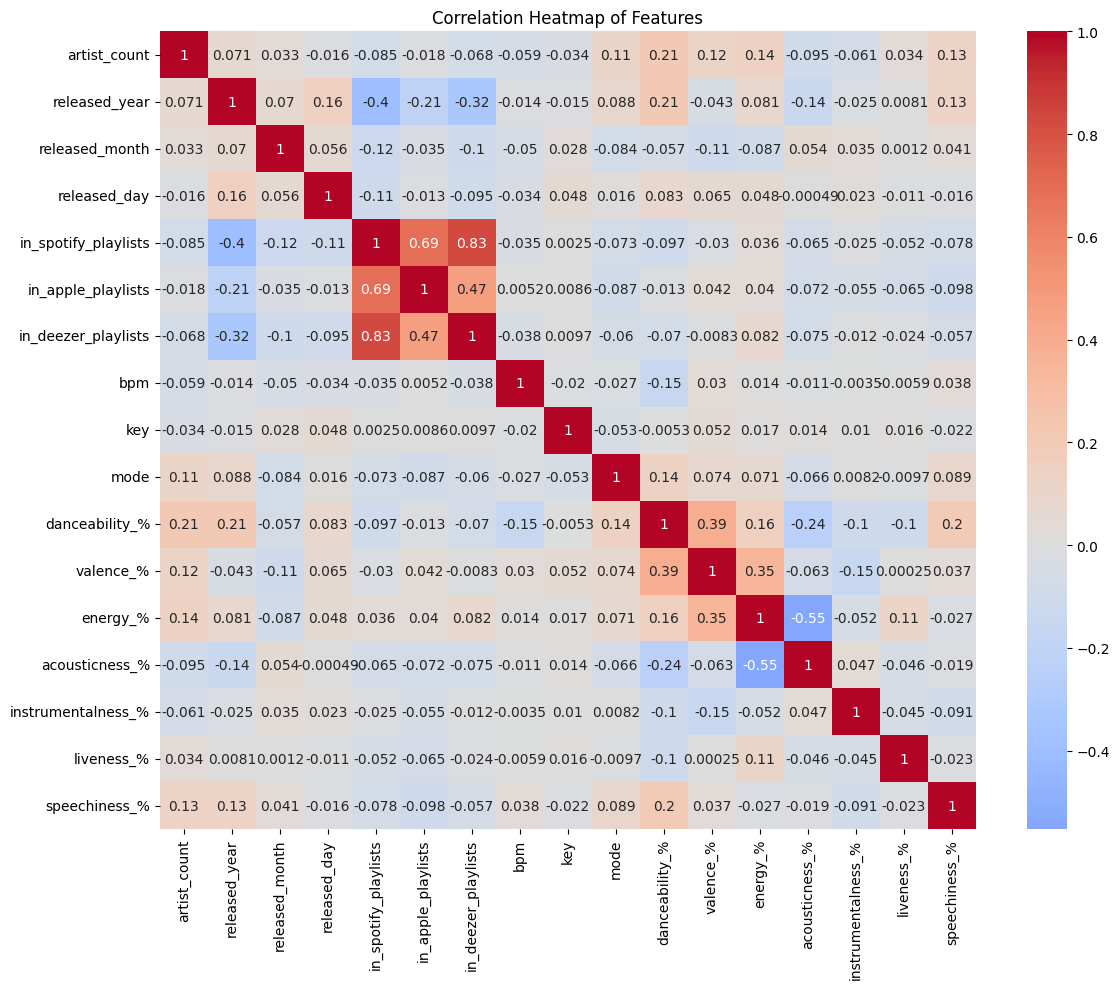

In [20]:
# 4. Correlation Heatmap of Features
plt.figure(figsize=(12, 10))
correlation_matrix = dfSpotify_clean[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

The heatmap uses color intensity to show correlation strength: dark red for strong positive correlations (+1), dark blue for strong negative correlations (-1), and lighter colors for weak correlations (closer to 0). This helps us quickly identify which features tend to move together or in opposite directions.

# Additional Models
We did additionals models covered in class on the latter half of the semester. This includes a KNN Model with its scatter plot production.

## Decision Tree

Decision Tree Regression Results:
Mean Squared Error: 7.922608025157709e+16
R-squared: 0.7416163127915192

Decision Tree Classification Results:
Accuracy: 0.854

Classification Report:
              precision    recall  f1-score   support

       False       0.59      0.46      0.52        28
        True       0.89      0.93      0.91       136

    accuracy                           0.85       164
   macro avg       0.74      0.70      0.72       164
weighted avg       0.84      0.85      0.85       164



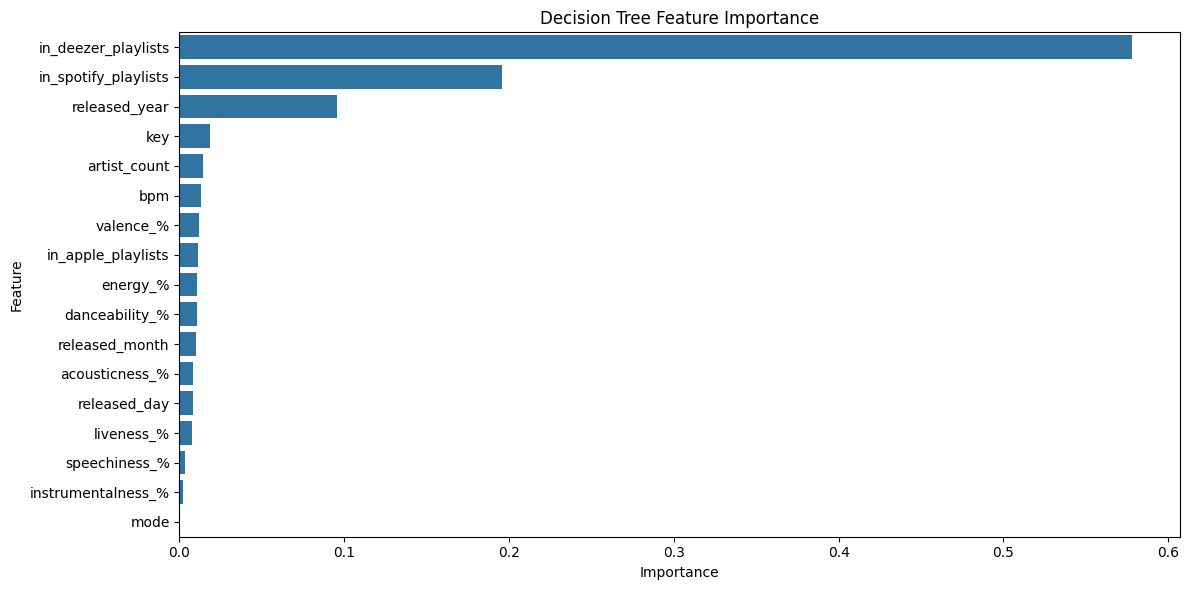

In [21]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Create and train the regression tree
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

dt_streams_pred = dt_regressor.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_streams_pred)
dt_r2 = r2_score(y_test, dt_streams_pred)

print("Decision Tree Regression Results:")
print(f"Mean Squared Error: {dt_mse}")
print(f"R-squared: {dt_r2}")

# Decision tree for classification (Predicting Hits)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train >= HitNumber)  # Using the same HitNumber threshold

dt_hit_pred = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test >= HitNumber, dt_hit_pred)
print("\nDecision Tree Classification Results:")
print(f"Accuracy: {dt_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test >= HitNumber, dt_hit_pred))

plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt_regressor.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

## Decision Tree Summary
The Decision Tree model performs well, with high accuracy for classifying hits and a strong R² for regression.
Playlist features are the most influential in predicting a song's popularity.
The model is better at identifying hits than non-hits, likely due to more hits in the data.

These results are consistent with our earlier findings using linear regression.

In [22]:
hit_rate_by_key = dfSpotify_clean.groupby('key')['hit'].mean().sort_values(ascending=False)
print(hit_rate_by_key)

key
4     0.884615
5     0.866667
1     0.854545
9     0.846154
8     0.840580
6     0.830508
10    0.823529
2     0.805195
7     0.804598
3     0.791304
0     0.771429
Name: hit, dtype: float64


In [23]:
# calculate training set R² for comparison table

dt_train_r2 = dt_regressor.score(X_train, y_train)
dt_train_r2

1.0

# Release Timing
Is there a certain release time that prevalent among popular songs?

released_month
1     0.866071
2     0.867925
3     0.835616
4     0.825397
5     0.719298
6     0.616438
7     0.723404
8     1.000000
9     0.934783
10    0.968254
11    0.924242
12    0.779412
Name: hit, dtype: float64


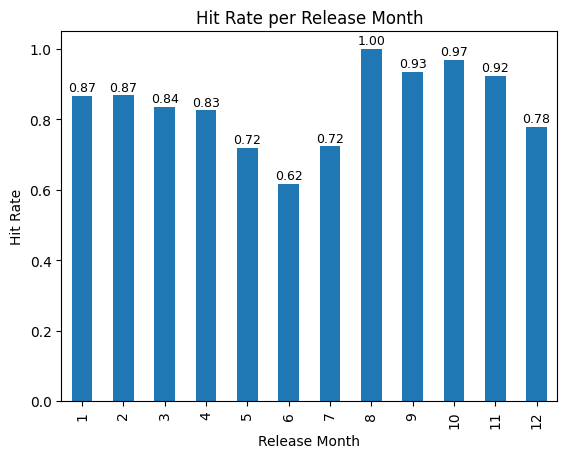

In [39]:
hit_rate_per_month = dfSpotify_clean.groupby('released_month')['hit'].mean()

# Show exact numbers
print(hit_rate_per_month)


fig, ax = plt.subplots()
hit_rate_per_month.plot(kind='bar', ax=ax)

# Add exact values above bars
for i, value in enumerate(hit_rate_per_month):
    ax.text(i, value + 0.005, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Hit Rate')
ax.set_xlabel('Release Month')
ax.set_title('Hit Rate per Release Month')

plt.show()




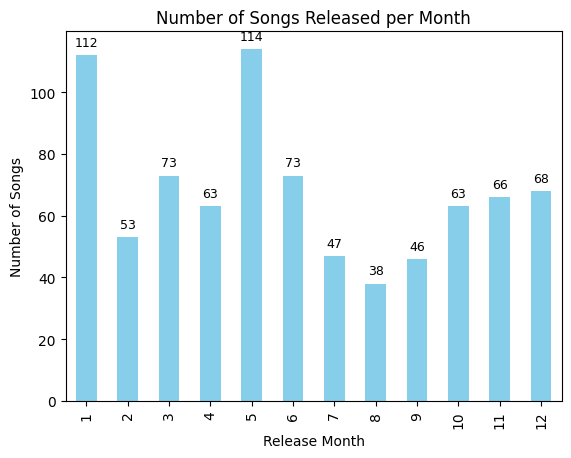

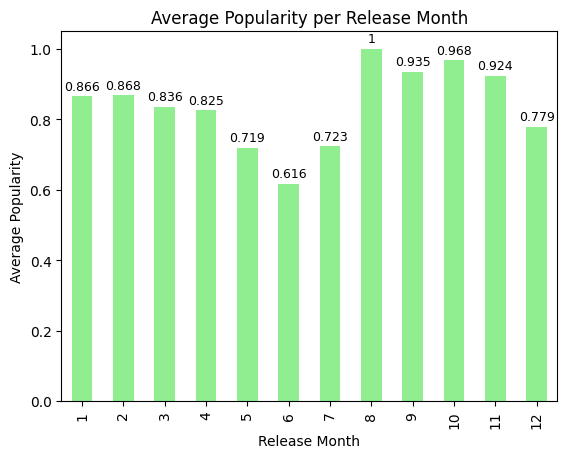

In [41]:

# 1. Number of songs released per month
songs_per_month = dfSpotify_clean.groupby('released_month').size()

fig, ax = plt.subplots()
songs_per_month.plot(kind='bar', ax=ax, color='skyblue')

# Add exact counts above bars
for i, value in enumerate(songs_per_month):
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Number of Songs')
ax.set_xlabel('Release Month')
ax.set_title('Number of Songs Released per Month')
plt.show()


# 2. Average popularity per month
hit_rate_per_month = dfSpotify_clean.groupby('released_month')['hit'].mean()

fig, ax = plt.subplots()
hit_rate_per_month.plot(kind='bar', ax=ax, color='lightgreen')

# Add exact averages above bars
for i, value in enumerate(hit_rate_per_month):
    ax.text(i, value + 0.01, f"{value:.3g}", ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Average Popularity')
ax.set_xlabel('Release Month')
ax.set_title('Average Popularity per Release Month')
plt.show()



## KNN Model

KNN Regression Model:
--------------------------------------------------
Optimal number of neighbors: 7
KNN Regression Mean Squared Error: 85,977,360,038,542,288.00
KNN Regression R-squared: 0.720

Comparison with Linear Regression:
--------------------------------------------------
Linear Regression R-squared: 0.728
KNN Regression R-squared: 0.720
Linear Regression MSE: 83,411,992,324,629,008.00
KNN Regression MSE: 85,977,360,038,542,288.00


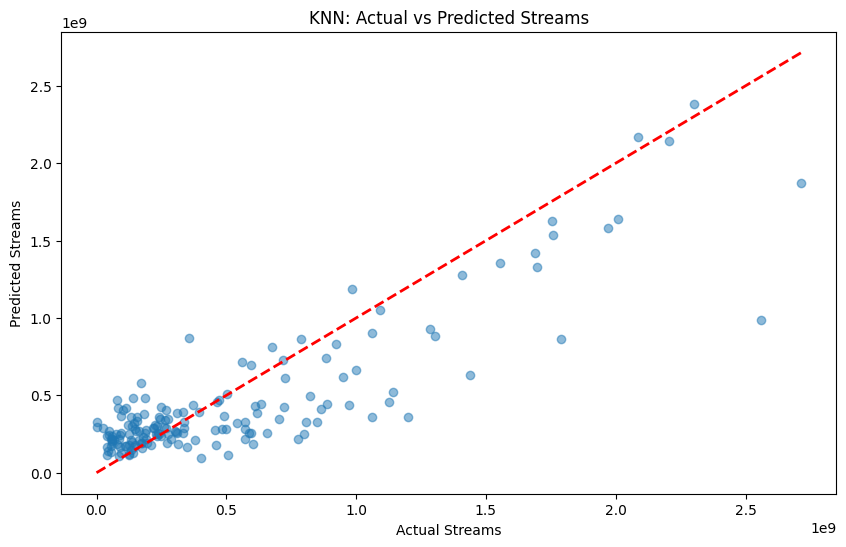

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("KNN Regression Model:")
print("-" * 50)

k_values = range(1, 21)
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Getting the best k value with minimum MSE
best_k = k_values[mse_values.index(min(mse_values))]
print(f"Optimal number of neighbors: {best_k}")

# Training final KNN model with best k
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train, y_train)

# making the predictions
y_pred_knn = knn_regressor.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression Mean Squared Error: {mse_knn:,.2f}")
print(f"KNN Regression R-squared: {r2_knn:.3f}")

print("\nComparison with Linear Regression:")
print("-" * 50)
print(f"Linear Regression R-squared: {R2:.3f}")
print(f"KNN Regression R-squared: {r2_knn:.3f}")
print(f"Linear Regression MSE: {MSE:,.2f}")
print(f"KNN Regression MSE: {mse_knn:,.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('KNN: Actual vs Predicted Streams')
plt.show()

In [ ]:
# calculate training set R² for comparison table

knn_train_r2 = knn_regressor.score(X_train, y_train)
knn_train_r2

0.7093680944916909

## KNN Model Summary
The KNN regression model performed similarly to linear regression, with an R² of 0.72 compared to 0.73 for linear regression. Both models predict the majority of songs' stream counts reasonably well, however both struggle to accurately predict the most popular songs with extremely high stream counts. This suggests that while local similarity (as used by KNN) is somewhat useful, the overall relationship between features and streams is largely linear, and both models are limited by the same factors in the data.

## Clustering Model


Number of songs in each cluster:
cluster
0    725
1     91
Name: count, dtype: int64


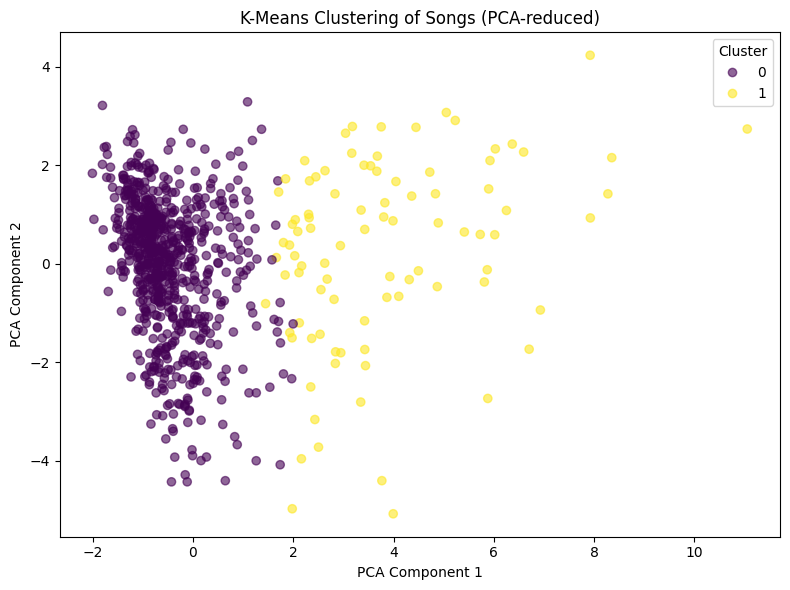

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

dfSpotify_clean['cluster'] = clusters

print("Number of songs in each cluster:")
print(dfSpotify_clean['cluster'].value_counts())

# Visualize clusters using PCA since we have a lot of features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Songs (PCA-reduced)')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()


## Clustering Evaluation
With the implementation of the clustering model we see two distinct clusters based on their features. Majority of the songs fell into one large group, whereas a smaller number formed the two other cluster *groups*. The scatter plot shows that these clusters are fairly well separated, meaning the songs within each group are more similar to each other than to songs in other groups. This suggests that there are clear patterns in the data that naturally divide the songs into different types or popularity levels.

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd # import pandas to use pd.to_numeric

# Recalculate cluster_means as the cell above was not run
cluster_means = dfSpotify_clean.groupby('cluster')[features].mean()

# Convert objects columns to numeric for visualization
cluster_means['in_deezer_playlists'] = pd.to_numeric(cluster_means['in_deezer_playlists'], errors='coerce')
cluster_means['key'] = pd.to_numeric(cluster_means['key'], errors='coerce')
cluster_means['mode'] = pd.to_numeric(cluster_means['mode'], errors='coerce')


print(cluster_means.dtypes)

artist_count            float64
released_year           float64
released_month          float64
released_day            float64
in_spotify_playlists    float64
in_apple_playlists      float64
in_deezer_playlists     float64
bpm                     float64
key                     float64
mode                    float64
danceability_%          float64
valence_%               float64
energy_%                float64
acousticness_%          float64
instrumentalness_%      float64
liveness_%              float64
speechiness_%           float64
dtype: object


## Summary Clustering + Heatmap
The heatmap shows the average value of each feature for every cluster, making it easy to see what makes each group unique. The most noticeable differences are in playlist features and release year. One cluster stands out with very high playlist counts and higher values for features like danceability and energy—these are likely the most popular or viral songs. Another cluster contains mostly newer songs with moderate popularity, while the last group has older songs with lower playlist presence and less energetic musical features. This visualization helps us quickly identify which characteristics are most important for distinguishing between different types of songs in the dataset.

Link: https://maristcollege-my.sharepoint.com/:x:/r/personal/isabella_garcia1_marist_edu/Documents/spotify-2023.xlsx?d=wdfedc82f755540de94b64470aaf2b946&csf=1&web=1&e=rH59hV  

This needs to be converted into a csv file for this specific code to run.